# A regression project on price prediction of Tesla stock price

In [177]:
# import the libraries needed for the exercise
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

#import data
file='C:\\Users\\IFEOLUWA\\Downloads\\tesla-stock-price\\Tesla.csv'
data= pd.read_csv(file)

In [178]:
start_date= datetime.date(2010,6,29)
end_date =datetime.date(2017,3,17)

In [179]:
data.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988
1691,3/17/2017,264.000000,265.329987,261.200012,261.500000,6475900,261.500000


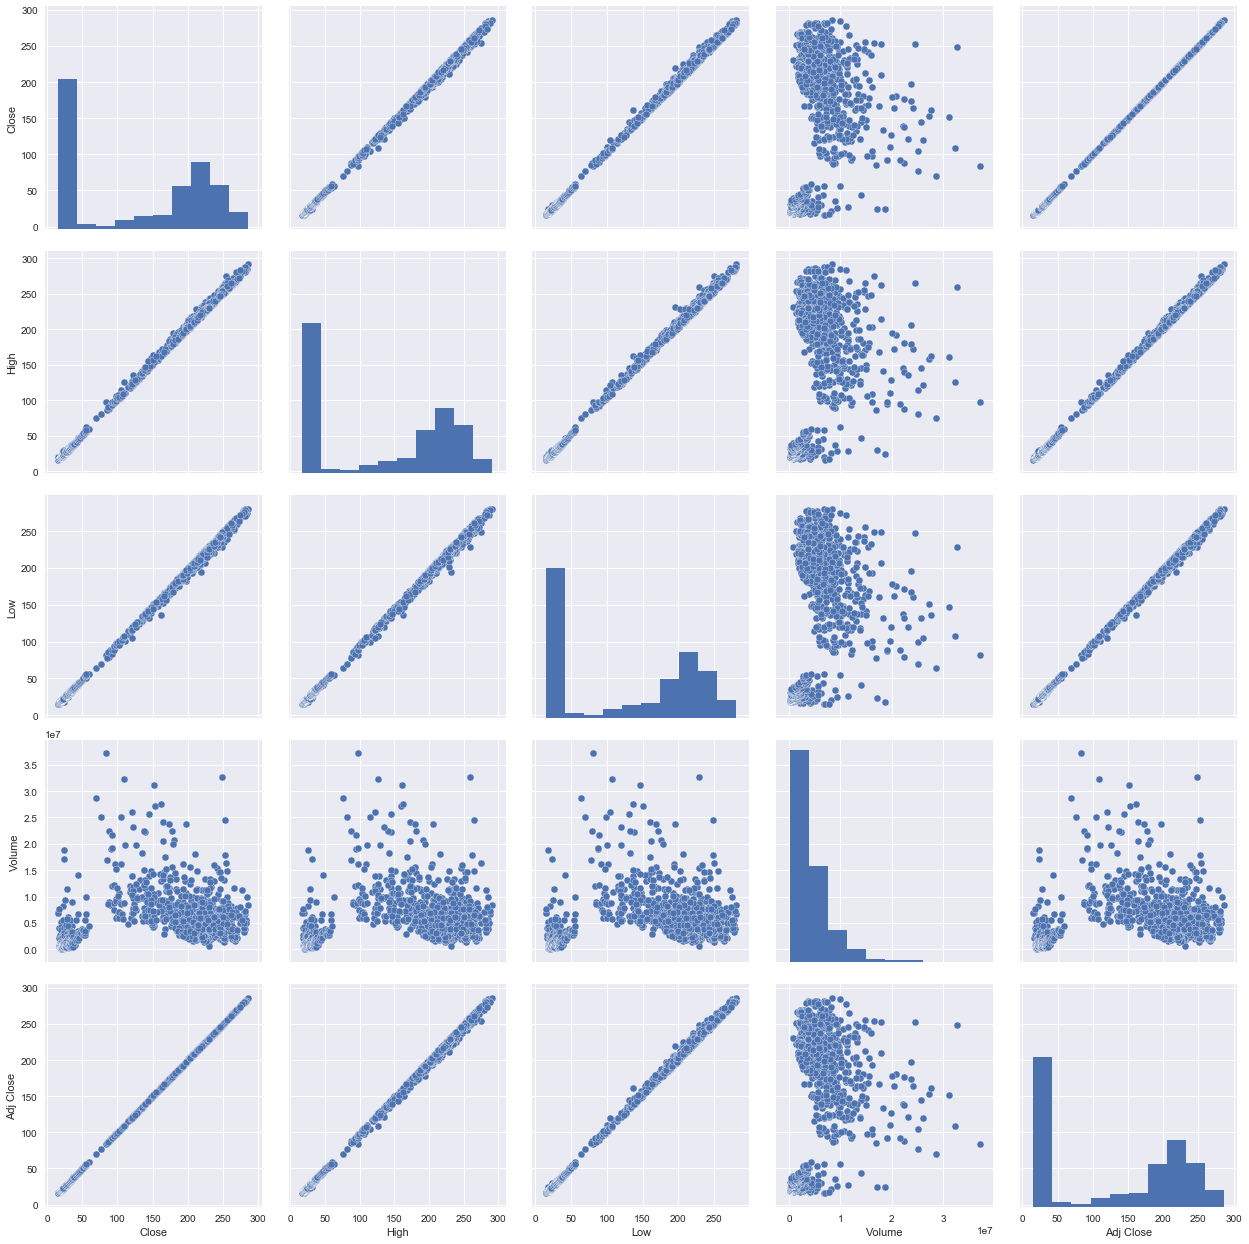

In [180]:
# data visualization 
#scatterplot
sns.set()
cols = ['Close', 'Date', 'High', 'Low', 'Volume', 'Adj Close']
sns.pairplot(data[cols], size = 3.5)

In [181]:
prices=data['Close']
date= data['Date']
Op= data['Open']
date=str(data['Date'])
data['Date'] = pd.to_datetime(data['Date'])
data['date_delta'] = (data['Date'] - data['Date'].min()) /np.timedelta64(1, 'D')

Text(0,0.5,'Price of Stock')

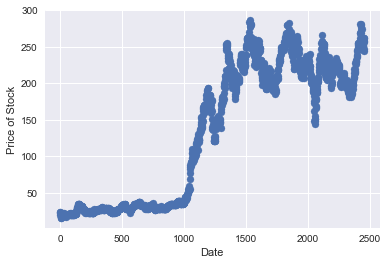

In [182]:
# Visualising the stock price in relation to the date
plt.scatter(data['date_delta'],prices)
plt.xlabel('Date')
plt.ylabel('Price of Stock')

In [183]:
# Reshaping data
prices=data['Close'].tolist()
Op= data['Open'].tolist()
prices=np.reshape(prices,(len(prices),1))
Op=np.reshape(Op,(len(Op),1))

In [184]:
# Using Opening stock price as our only feature
regressor=LinearRegression()
regressor.fit(Op,prices)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

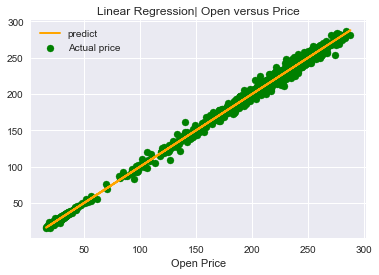

In [185]:
# line of best fit: Opening stock price and Final stock price are positively correlated
plt.scatter(Op,prices,color='green', label='Actual price')
plt.plot(Op,regressor.predict(Op), color= 'orange',linewidth=2,label='predict')
plt.title('Linear Regression| Open versus Price')
plt.legend()
plt.xlabel('Open Price')
plt.show()

In [186]:

x=data['Open']
y=data['Close']


#Splitting the dataset into the Training set and Test set
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.33)

# Fitting the train data set
xtrain=xtrain.values.reshape((-1,1))
ytrain=ytrain.values.reshape((-1,1))
regressor.fit(xtrain, ytrain)

# Calculating the mean square error
pred= regressor.predict(xtrain)
mse = np.mean((pred - ytrain)**2)
mse

 



14.062313871014643

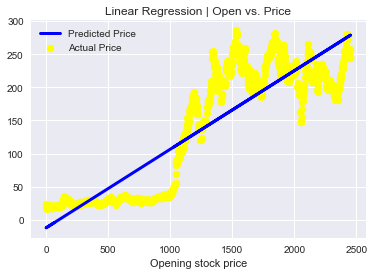

In [213]:
#Train Set Graph

plt.scatter(xtrain, ytrain, color='yellow', label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtrain, regressor.predict(xtrain), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression | Open vs. Price')
plt.legend()
plt.xlabel('Opening stock price')
plt.show()

In [214]:
#Test Set Graph
xtest=xtest.values.reshape((-1,1))
ytest=ytest.values.reshape((-1,1))
plt.scatter(xtest, ytest, color='yellow', label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtest, regressor.predict(xtest), color='green', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression | Open vs. Price')
plt.legend()
plt.xlabel('Opening stock price')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [207]:
# predict final stock price on giving opening opening stock price
predicted_price= regressor.predict(Op)
print(predicted_price[0][0],regressor.coef_[0][0] ,regressor.intercept_[0])

-10.13862995460129 0.11763216638734529 -12.37364111596085


In [208]:
# using Date as the only feature

x=data['date_delta']
y=data['Close']


#Splitting the dataset into the Training set and Test set
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.33)

xtrain = xtrain.values.reshape((-1, 1))

ytrain = ytrain.values.reshape((-1, 1))

# Fitting data
regressor.fit(xtrain, ytrain)
 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [209]:
# Checking the Mean square error
pred= regressor.predict(xtrain)
mse = np.mean((pred - ytrain)**2)
mse

1869.5789257456217

In [210]:
#The mean square error is  far larger than than that of the opening stock price. 
#Which implies that using just date as our feature will make terrible predictions which will cost us losing a lot of money.

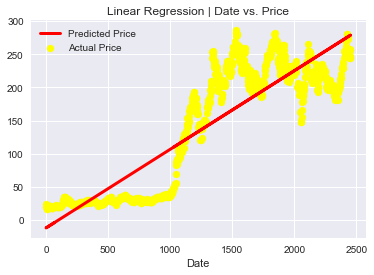

In [211]:
#Train Set Graph
plt.scatter(xtrain, ytrain, color='yellow', label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtrain, regressor.predict(xtrain), color='red', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression | Date vs. Price')
plt.legend()
plt.xlabel('Date')
a=plt.show()
a

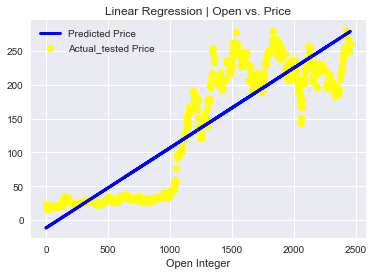

In [212]:
#Test Set Graph

xtest = xtest.values.reshape((-1, 1))
ytest = ytest.values.reshape((-1, 1))
plt.scatter(xtest, ytest, color='yellow', label= 'Actual_tested Price') #plotting the initial datapoints
plt.plot(xtest, regressor.predict(xtest), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression | Open vs. Price')
plt.legend()
plt.xlabel('Date')
plt.show()


In [215]:
# Seeing that just the date feature is not duty justice to the data
# I increased the number of features
# using multiple features

high= data['High'].tolist()
high=np.reshape(high,(len(high),1))

x=data.loc[:,['High','Open','date_delta']]
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.33)
regressor=LinearRegression()
regressor.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [216]:
# Calculating the mean square error
pred= regressor.predict(xtrain)
mse = np.mean((pred - ytrain)**2)
mse

5.434524575893637

In [217]:
# It can be observed above that using multiple features has reduced our mean square error. which is more preferred to just the date or the opening stock price

In [218]:
regressor.score(xtrain,ytrain)

0.9993845862695633

In [219]:
# Just curious about this

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [220]:
lassoReg= Lasso(alpha=0.3,normalize=True)
lassoReg.fit(xtrain,ytrain)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [221]:
lassoReg.score(xtrain,ytrain)

0.9878297474445454

In [222]:
RidgeReg= Ridge(alpha=0.3,normalize=True)
RidgeReg.fit(xtrain,ytrain)
RidgeReg.score(xtrain,ytrain)

0.9800223261115637

In [223]:
regressor.fit(xtest,ytest)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [224]:
regressor.score(xtest,ytest)

0.9994157464279334

In [225]:
lassoReg.fit(xtest,ytest)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [226]:
lassoReg.score(xtest,ytest)

0.9938111554984326

In [105]:
RidgeReg.score(xtest,ytest)

0.9774462608095952

In [106]:
predicted_price= regressor.predict(x)
print(predicted_price[0])

24.02166955419957


In [227]:
# using all features except AdjClose because its values are very close to the final stock price

volume= data['Volume'].tolist()
volume=np.reshape(high,(len(volume),1))
low= data['Low'].tolist()
low=np.reshape(low,(len(low),1))

x=data.loc[:,['High','Open','date_delta','Low','Volume']]
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.33)
regressor=LinearRegression()
regressor.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [228]:
# calculating the mean square error
pred= regressor.predict(xtrain)
mse = np.mean((pred - ytrain)**2)
mse


2.2201720747369764

In [229]:
# It can been seen that the above algorithm gave the smallest MSE

In [230]:
# The predicted price
predicted_price= regressor.predict(x)
print(predicted_price[0])

22.509778278434492


In [231]:
# Just curious Not important
RidgeReg= Ridge(alpha=0.3,normalize=True)
RidgeReg.fit(xtrain,ytrain)
RidgeReg.score(xtrain,ytrain)

0.9886110143161135

In [232]:
regressor.fit(xtest,ytest)
RidgeReg.score(xtest,ytest)

0.988421533789219

In [ ]:
# What I noticed from the above exercise is using just the date feature won't give an accurate prediction.
# this led to using other variables which gave a minimal mean square error.